In [1]:
import torch
torch.set_grad_enabled(False)
import math
from dataset import generate_dataset_disk
from module import *
from training import train, test
from plotter import *
from mlxtend.plotting import plot_decision_regions


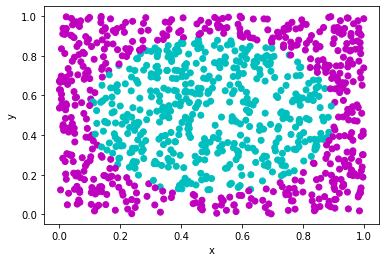

In [2]:
# Load the dataset
train_input, train_label = generate_dataset_disk()
test_input, test_label = generate_dataset_disk(plot=False)

In [3]:
model = Sequential(Linear(2, 25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,2), Sigmoid())
loss_function = Loss(model, fun='MSE')
batch_size = 25
nb_epochs = 300
lr = 1e-3

Epoch 10/300, Train_Loss: 0.2983, Val_Loss: 0.3085
Epoch 20/300, Train_Loss: 0.2008, Val_Loss: 0.1941
Epoch 30/300, Train_Loss: 0.1442, Val_Loss: 0.1273
Epoch 40/300, Train_Loss: 0.1131, Val_Loss: 0.0920
Epoch 50/300, Train_Loss: 0.0948, Val_Loss: 0.0701
Epoch 60/300, Train_Loss: 0.0820, Val_Loss: 0.0560
Epoch 70/300, Train_Loss: 0.0723, Val_Loss: 0.0462
Epoch 80/300, Train_Loss: 0.0658, Val_Loss: 0.0381
Epoch 90/300, Train_Loss: 0.0607, Val_Loss: 0.0322
Epoch 100/300, Train_Loss: 0.0565, Val_Loss: 0.0279
Epoch 110/300, Train_Loss: 0.0534, Val_Loss: 0.0248
Epoch 120/300, Train_Loss: 0.0503, Val_Loss: 0.0223
Epoch 130/300, Train_Loss: 0.0478, Val_Loss: 0.0195
Epoch 140/300, Train_Loss: 0.0459, Val_Loss: 0.0178
Epoch 150/300, Train_Loss: 0.0441, Val_Loss: 0.0157
Epoch 160/300, Train_Loss: 0.0423, Val_Loss: 0.0143
Epoch 170/300, Train_Loss: 0.0408, Val_Loss: 0.0128
Epoch 180/300, Train_Loss: 0.0395, Val_Loss: 0.0117
Epoch 190/300, Train_Loss: 0.0384, Val_Loss: 0.0110
Epoch 200/300, Train_

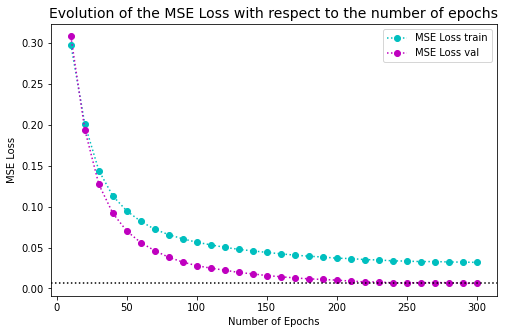

In [4]:
train(model, loss_function, train_input, train_label, nb_epochs, lr, batch_size=batch_size, show_plot=True)

In [5]:
train_error = test(model, train_input, train_label)
test_error = test(model, test_input, test_label)

print('Train Error: {}%'.format(train_error))
print('Test Error: {}%'.format(test_error))

Train Error: 2.1%
Test Error: 3.9%


In [7]:
class ModelNoHoneHot():
    def __init__(self, model):
        self.model = model

    def predict(self, x):
        x = torch.tensor(x)
        preds = self.model(x)
        return torch.argmax(preds, dim=1).numpy()




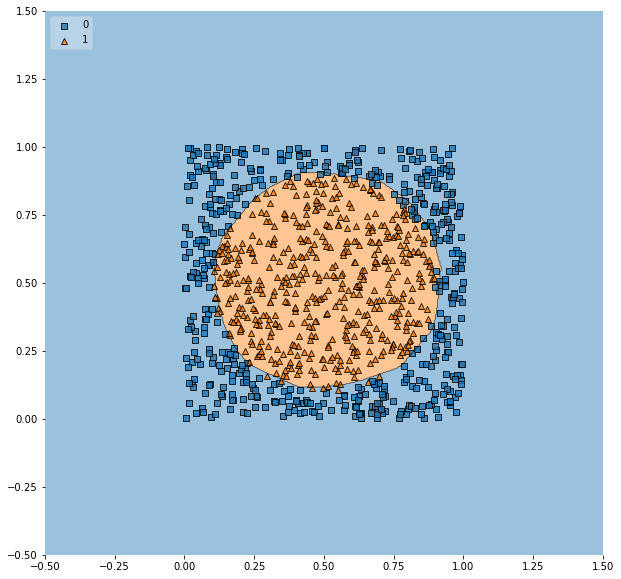

In [10]:
model_no_one_hot = ModelNoHoneHot(model)
plt.figure(figsize=(10, 10))
plot_decision_regions(test_input.numpy(), torch.argmax(test_label, dim=1).numpy(), clf=model_no_one_hot, legend=2)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()